# Analysis on KNN, Decision Trees and Random Forest on different Test cases[10%, 20%, 30%]

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Reading Data

In [2]:
df = pd.read_csv('mnist.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y= df['label']
X = df.drop("label", axis = 'columns')

## Normalizing data

In [4]:
Xpro = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [5]:
X10_train, X10_test, Y10_train, Y10_test = train_test_split(Xpro,Y, test_size =0.1, random_state =0)
X20_train, X20_test, Y20_train, Y20_test = train_test_split(Xpro,Y, test_size =0.2, random_state =0)
X30_train, X30_test, Y30_train, Y30_test = train_test_split(Xpro,Y, test_size =0.3, random_state =0)

### Displaying Image 

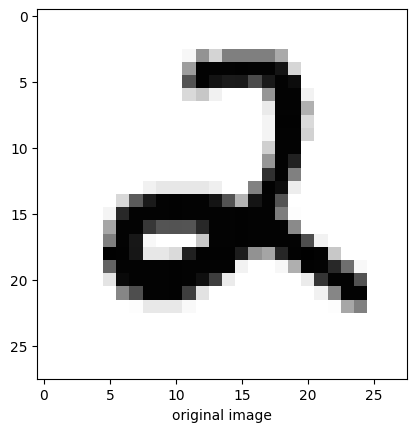

In [6]:
io = X.iloc[16462].to_numpy()
img = io.reshape((28,28))
plt.imshow(img, cmap="Greys")
plt.xlabel('original image')
plt.show()

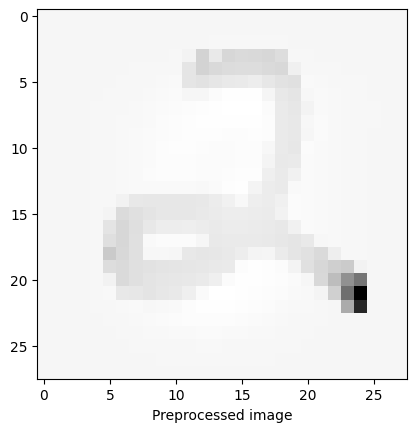

In [7]:
oi = X10_train[0]
img = oi.reshape((28,28))
plt.imshow(img, cmap="Greys")
plt.xlabel('Preprocessed image')
plt.show()

## KNN function 

In [8]:
def KNN(X_train, X_test, y_train, y_test):
    Ks =11
    mean_acc = np.zeros((Ks-1))

    for n in range(1,Ks):
    
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = accuracy_score(y_test, yhat)


    plt.plot(range(1,Ks), mean_acc,'g')
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbors (K)')
    plt.show()
    print( "The best accuracy was with", round(mean_acc.max()*100,2), "with k=", mean_acc.argmax()+1,"\n\n")

    neigh1 = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)
    yhat1=neigh1.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test , yhat1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
    disp.plot()
    plt.show()

## KNN Classfier for 10% test case

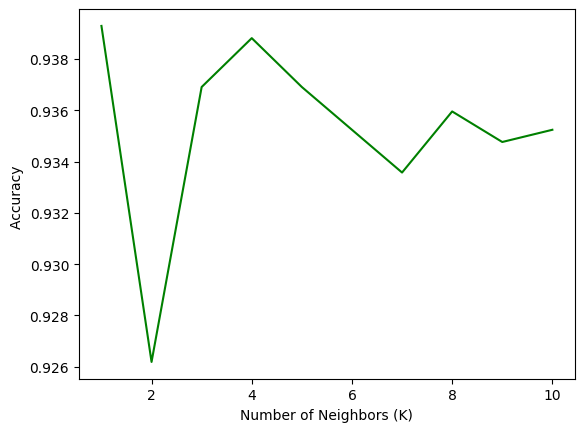

The best accuracy was with 93.93 with k= 1 




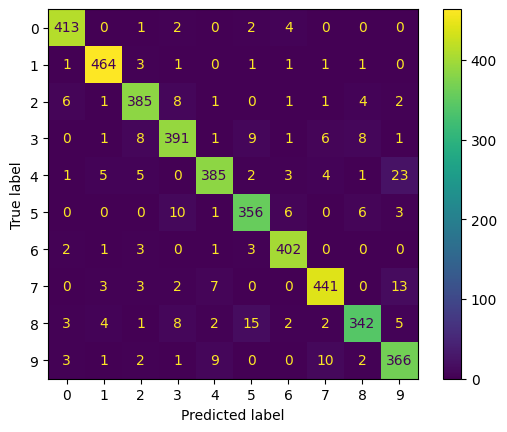

In [9]:
KNN(X10_train, X10_test, Y10_train, Y10_test)

## KNN Classfier for 20% test case

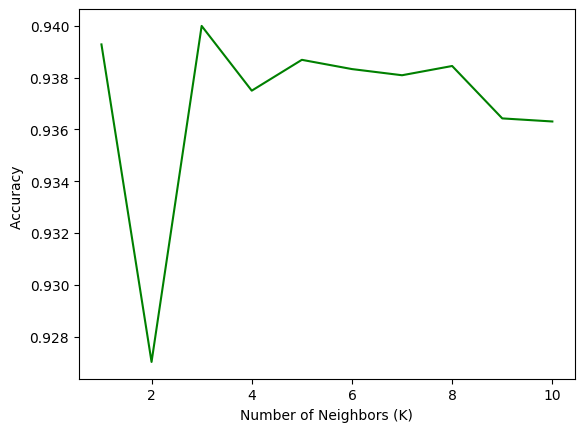

The best accuracy was with 94.0 with k= 3 




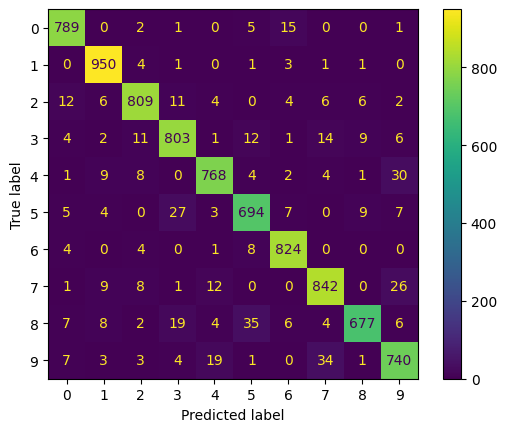

In [10]:
KNN(X20_train, X20_test, Y20_train, Y20_test)

## KNN Classfier for 30% test case

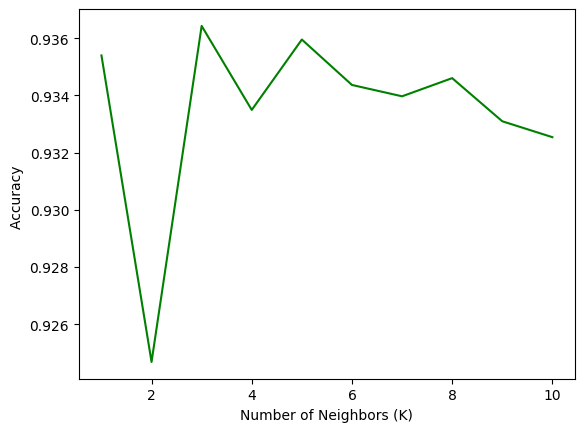

The best accuracy was with 93.64 with k= 3 




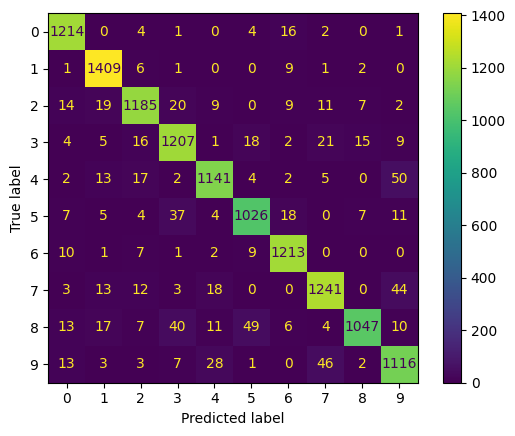

In [11]:
KNN(X30_train, X30_test, Y30_train, Y30_test)

# Decision Tree before Purning

accuracy score=  86.26


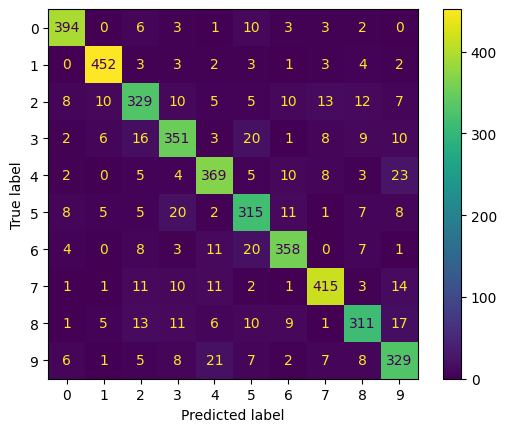

In [12]:
dectree100 = DecisionTreeClassifier(criterion='entropy',splitter ='best')
D100 = dectree100.fit(X10_train, Y10_train)
predtree100 = D100.predict(X10_test)
acc100 = accuracy_score(Y10_test, predtree100)
print("accuracy score= ", round(acc100*100,2))

cf_matrix = confusion_matrix(Y10_test , predtree100)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

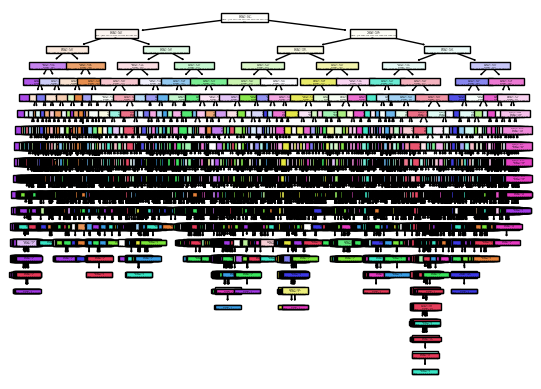

In [13]:
tree.plot_tree(dectree100, filled=True)
plt.show()

## To avoid Over fitting and to reduce complexity we are eliminating nodes with low information gain nodes

Text(0, 0.5, 'Accuracy')

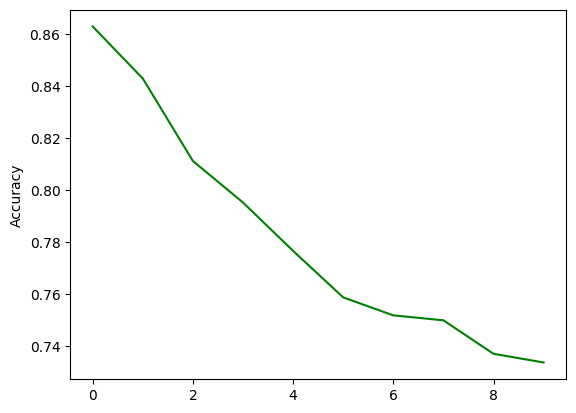

In [14]:
acc10 = np.zeros(10)
j =0
for i in range(0,10):
    dectree10 = DecisionTreeClassifier(criterion='entropy',splitter ='best', min_impurity_decrease =j)
    D10 = dectree10.fit(X10_train, Y10_train)
    predtree10 = D10.predict(X10_test)
    acc10[i] = accuracy_score(Y10_test, predtree10)
    j +=0.001

plt.plot(range(10),acc10,'g')
plt.ylabel('Accuracy')

### I choose 0.002 as information gain limiter because we still get 80+ % accuracy
### If information gain is lower than 0.002 (i.e 0.2%)the node won't split

accuracy score=  81.14


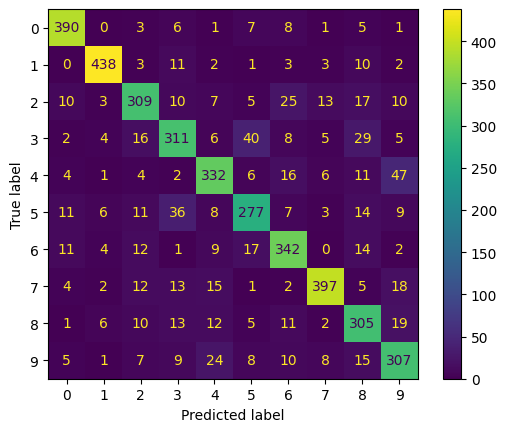

In [15]:
dectree10 = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth =10 , min_impurity_decrease =0.002)
D10 = dectree10.fit(X10_train, Y10_train)
predtree10 = D10.predict(X10_test)
acc10 = accuracy_score(Y10_test, predtree10)
print("accuracy score= ", round(acc10*100,2))

cf_matrix = confusion_matrix(Y10_test , predtree10)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

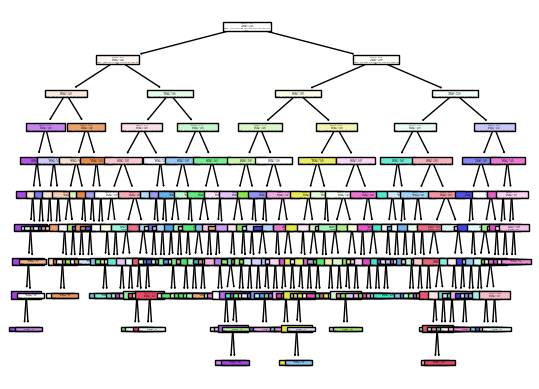

In [16]:
tree.plot_tree(dectree10, filled=True)
plt.show()

accuracy score=  81.44


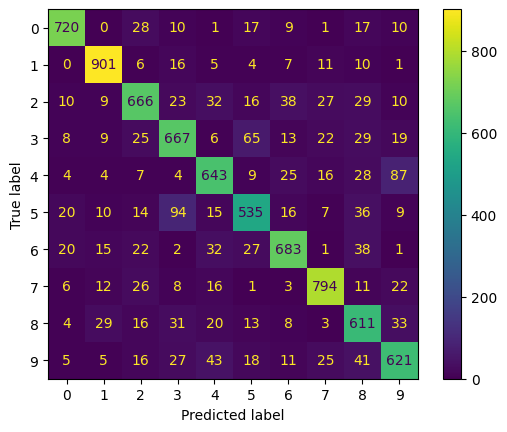

In [17]:
dectree20 = DecisionTreeClassifier(criterion='entropy',splitter ='best', max_depth =10, min_impurity_decrease =0.002)
D20 = dectree20.fit(X20_train, Y20_train)
predtree20 = D20.predict(X20_test)
acc20 = accuracy_score(Y20_test, predtree20)
print('accuracy score= ', round(acc20*100,2))

cf_matrix = confusion_matrix(Y20_test , predtree20)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

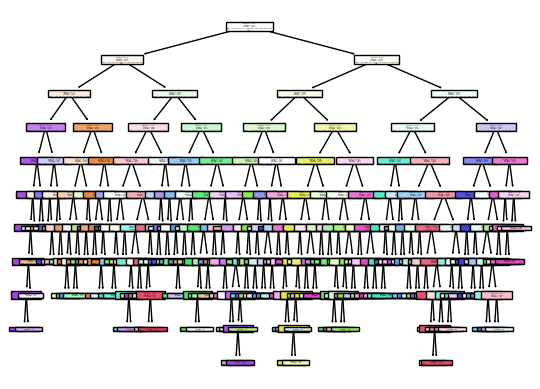

In [18]:
tree.plot_tree(dectree20, filled=True)
plt.show()

accuracy score=  82


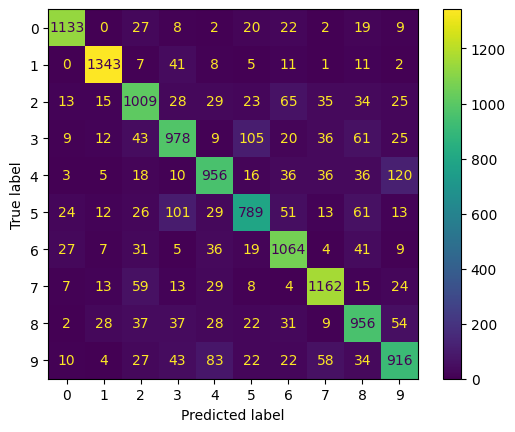

In [6]:
dectree30 = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth =10, min_impurity_decrease =0.002)
D30 = dectree30.fit(X30_train, Y30_train)
predtree30 = D30.predict(X30_test)
acc30 = accuracy_score(Y30_test, predtree30)
print('accuracy score= ', round(acc30*100))

cf_matrix = confusion_matrix(Y30_test , predtree30)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

In [10]:
p = D30.predict(X30_train)
acc = accuracy_score(p , Y30_train)
print(acc)

0.8406802721088436


In [7]:
nodes =dectree30.tree_.node_count
print(nodes)

335


In [11]:
print(len(Y30_train))

29400


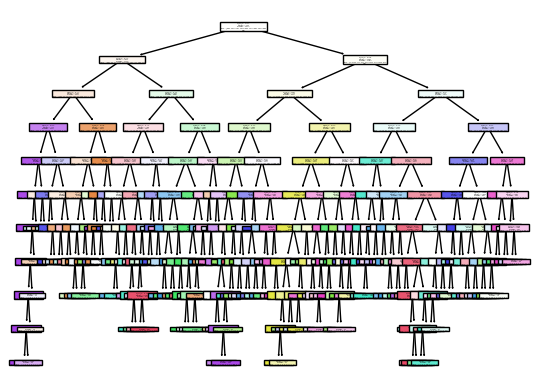

In [20]:
tree.plot_tree(dectree30, filled=True)
plt.show()

accuracy score=  95.95


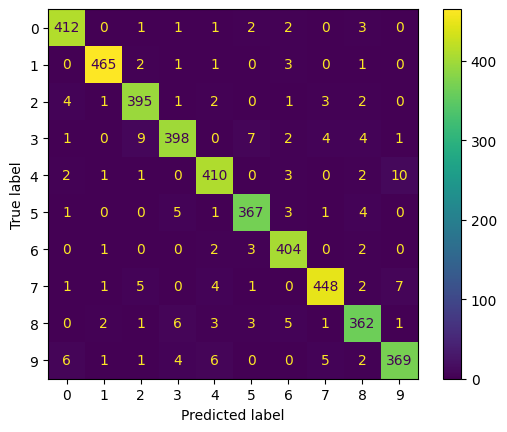

In [21]:
RFclassifier10 = RandomForestClassifier(n_estimators= 100, criterion="entropy")
RFclassifier10.fit(X10_train, Y10_train)
Y10_pred= RFclassifier10.predict(X10_test) 
RFacc10 = accuracy_score(Y10_test, Y10_pred)
print("accuracy score= ", round(RFacc10*100,2))

cf_matrix = confusion_matrix(Y10_test ,Y10_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()


accuracy score=  96.38


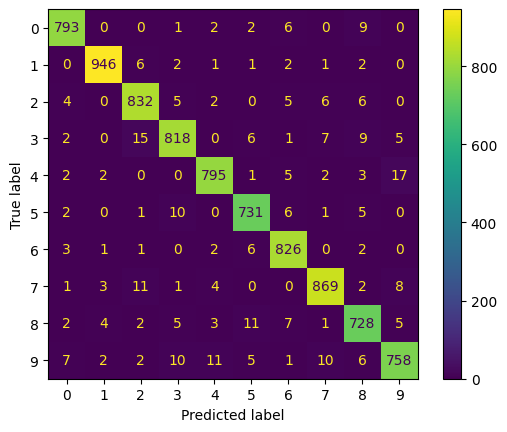

In [22]:
RFclassifier20= RandomForestClassifier(n_estimators= 100, criterion="entropy")
RFclassifier20.fit(X20_train, Y20_train)
Y20_pred= RFclassifier20.predict(X20_test) 
RFacc20 = accuracy_score(Y20_test, Y20_pred)
print("accuracy score= ", round(RFacc20*100,2))

cf_matrix = confusion_matrix(Y20_test ,Y20_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()


accuracy score=  96.12


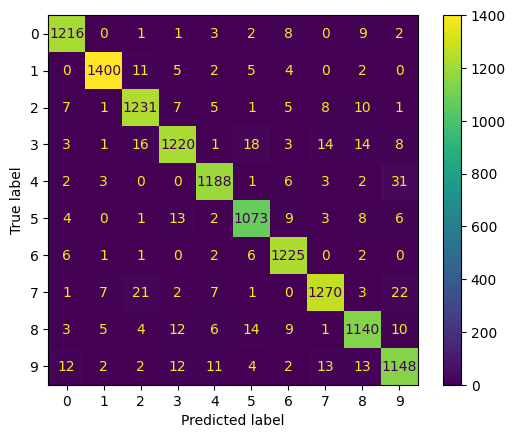

In [23]:
RFclassifier30= RandomForestClassifier(n_estimators= 100, criterion="entropy")
RFclassifier30.fit(X30_train, Y30_train)
Y30_pred= RFclassifier30.predict(X30_test) 
RFacc30 = accuracy_score(Y30_test, Y30_pred)
print("accuracy score= ", round(RFacc30*100,2))

cf_matrix = confusion_matrix(Y30_test ,Y30_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()


In [24]:
data = {'Classifier': ['KNN', 'Decision Tree', 'Random Forest'],
        '10% test': ["93.93%", "81.12%", "95.83%"],
        '20% test': ["94%","81.43%", "96.38%"],
        '30% test': ["93.64%","81.77%","96.11%"]}
data = pd.DataFrame(data)

# CONCLUSION

In [25]:
print("ACCURACY FOR EACH CLASSIFIER FOR DIFFERENT TEST CASES")
data.head()

ACCURACY FOR EACH CLASSIFIER FOR DIFFERENT TEST CASES


,Classifier,10% test,20% test,30% test
0,KNN,93.93%,94%,93.64%
1,Decision Tree,81.12%,81.43%,81.77%
2,Random Forest,95.83%,96.38%,96.11%


We can see that random forest is best classifier for given data and KNN is 2nd best classifer.
We have observed the optimal K value is 3.

information gain = entropy of parent node - entropy of children node 
We have put the minimum information gain as 0.2% if minimum information is less than 0.2% the node won't split.
We purn tree to reduce complexity and avoid overfitting.